# Imports

In [1]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np

from sklearn import svm, tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
plt.style.use('ggplot')

import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
data = pd.read_csv("SkillCraft.csv")

In [3]:
data.drop(columns = 'GameID', inplace = True)

In [4]:
y = data['LeagueIndex']
X = data.drop(columns = 'LeagueIndex')

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.30, random_state = 42)

In [39]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), 
                              columns = X.columns, index = X_test.index)

In [40]:
y_train = keras.utils.to_categorical(y_train, 8)
y_test = keras.utils.to_categorical(y_test, 8)

In [41]:
X_train_scaled_sample.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0.054336,-0.857939,-0.011632,-1.192218,-0.660759,-0.186048,0.625942,0.504050,-0.551495,-0.501285,0.619257,0.930702,-1.483268,-0.760485,-0.766169,-0.309600,-0.563793,-0.505560
1,1.036470,-0.415396,-0.026866,-0.587631,-0.547339,0.369940,-0.651149,-0.663334,1.244487,-0.161003,0.330652,-0.000021,-0.596390,-1.303524,-0.320466,-1.484223,-0.563793,-0.505560
2,-0.927799,0.764719,-0.007824,-0.278870,-0.175349,0.824724,0.200245,-0.250200,-0.606551,-0.347173,-0.691002,-0.425632,-0.079091,-1.439284,0.120759,-0.309600,-0.563793,0.107420
3,1.527537,0.174662,-0.007824,0.861605,-0.251577,1.592351,1.051639,3.054265,-0.110858,-1.707154,-0.343457,1.063260,9.290801,-1.846564,-0.201605,-1.484223,-0.563793,-0.505560
4,-1.173332,-0.267881,-0.017345,-1.067327,-0.829680,-0.927586,-0.651149,-0.663334,-0.039748,-0.027582,1.268849,-0.010237,-1.454706,0.325595,-1.137938,0.277712,-0.563793,-0.135502


In [42]:
model_1 = Sequential()
model_1.add(Dense(64, activation='tanh', input_shape=(18,)))
model_1.add(Dense(8, activation='softmax'))

In [43]:
model_1.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [44]:
results_1 = model_1.fit(X_train_scaled, y_train, epochs=50, batch_size=500, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/50
2336/2336 [==============================] - 0s 98us/step - loss: 2.0847 - acc: 0.1828 - val_loss: 2.0374 - val_acc: 0.2126
Epoch 2/50
2336/2336 [==============================] - 0s 9us/step - loss: 2.0575 - acc: 0.1935 - val_loss: 2.0129 - val_acc: 0.2206
Epoch 3/50
2336/2336 [==============================] - 0s 9us/step - loss: 2.0320 - acc: 0.2025 - val_loss: 1.9898 - val_acc: 0.2295
Epoch 4/50
2336/2336 [==============================] - 0s 8us/step - loss: 2.0081 - acc: 0.2140 - val_loss: 1.9684 - val_acc: 0.2395
Epoch 5/50
2336/2336 [==============================] - 0s 9us/step - loss: 1.9859 - acc: 0.2247 - val_loss: 1.9482 - val_acc: 0.2505
Epoch 6/50
2336/2336 [==============================] - 0s 8us/step - loss: 1.9650 - acc: 0.2359 - val_loss: 1.9294 - val_acc: 0.2585
Epoch 7/50
2336/2336 [==============================] - 0s 12us/step - loss: 1.9455 - acc: 0.2432 - val_loss: 1.9118 - val_acc: 0.2655
Epoch 8/50
2

In [22]:
def visualize_training_results(results):
    history = results.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

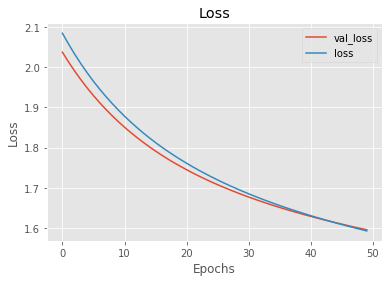

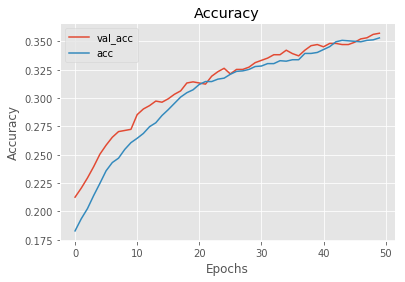

In [45]:
visualize_training_results(results_1)

In [46]:
model_2 = Sequential()
model_2.add(Dense(64, activation='tanh', input_shape=(18,)))
model_2.add(Dense(32, activation='tanh'))
model_2.add(Dense(8, activation='softmax'))

In [47]:
model_2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [50]:
results_2 = model_2.fit(X_train_scaled_sample, y_train_sample, epochs=200, batch_size=50, validation_data=(X_test_scaled, y_test))

Train on 4032 samples, validate on 1002 samples
Epoch 1/200
4032/4032 [==============================] - 0s 32us/step - loss: 0.8237 - acc: 0.6868 - val_loss: 1.7175 - val_acc: 0.3603
Epoch 2/200
4032/4032 [==============================] - 0s 28us/step - loss: 0.8234 - acc: 0.6882 - val_loss: 1.6966 - val_acc: 0.3543
Epoch 3/200
4032/4032 [==============================] - 0s 28us/step - loss: 0.8224 - acc: 0.6853 - val_loss: 1.7067 - val_acc: 0.3553
Epoch 4/200
4032/4032 [==============================] - 0s 30us/step - loss: 0.8215 - acc: 0.6880 - val_loss: 1.6928 - val_acc: 0.3563
Epoch 5/200
4032/4032 [==============================] - 0s 30us/step - loss: 0.8204 - acc: 0.6855 - val_loss: 1.6995 - val_acc: 0.3503
Epoch 6/200
4032/4032 [==============================] - 0s 33us/step - loss: 0.8193 - acc: 0.6887 - val_loss: 1.7037 - val_acc: 0.3483
Epoch 7/200
4032/4032 [==============================] - 0s 32us/step - loss: 0.8180 - acc: 0.6885 - val_loss: 1.6903 - val_acc: 0.3533


4032/4032 [==============================] - 0s 33us/step - loss: 0.7706 - acc: 0.7106 - val_loss: 1.7759 - val_acc: 0.3533
Epoch 61/200
4032/4032 [==============================] - 0s 31us/step - loss: 0.7695 - acc: 0.7088 - val_loss: 1.8072 - val_acc: 0.3473
Epoch 62/200
4032/4032 [==============================] - 0s 32us/step - loss: 0.7687 - acc: 0.7083 - val_loss: 1.7829 - val_acc: 0.3513
Epoch 63/200
4032/4032 [==============================] - 0s 31us/step - loss: 0.7685 - acc: 0.7054 - val_loss: 1.7908 - val_acc: 0.3523
Epoch 64/200
4032/4032 [==============================] - 0s 31us/step - loss: 0.7669 - acc: 0.7083 - val_loss: 1.8117 - val_acc: 0.3493
Epoch 65/200
4032/4032 [==============================] - 0s 31us/step - loss: 0.7662 - acc: 0.7103 - val_loss: 1.7959 - val_acc: 0.3473
Epoch 66/200
4032/4032 [==============================] - 0s 26us/step - loss: 0.7650 - acc: 0.7121 - val_loss: 1.7988 - val_acc: 0.3513
Epoch 67/200
4032/4032 [==============================

4032/4032 [==============================] - 0s 35us/step - loss: 0.7188 - acc: 0.7269 - val_loss: 1.8739 - val_acc: 0.3433
Epoch 120/200
4032/4032 [==============================] - 0s 28us/step - loss: 0.7179 - acc: 0.7277 - val_loss: 1.8814 - val_acc: 0.3483
Epoch 121/200
4032/4032 [==============================] - 0s 31us/step - loss: 0.7177 - acc: 0.7269 - val_loss: 1.8760 - val_acc: 0.3453
Epoch 122/200
4032/4032 [==============================] - ETA: 0s - loss: 0.7101 - acc: 0.730 - 0s 39us/step - loss: 0.7165 - acc: 0.7284 - val_loss: 1.8617 - val_acc: 0.3453
Epoch 123/200
4032/4032 [==============================] - 0s 56us/step - loss: 0.7155 - acc: 0.7314 - val_loss: 1.8957 - val_acc: 0.3483
Epoch 124/200
4032/4032 [==============================] - 0s 50us/step - loss: 0.7142 - acc: 0.7316 - val_loss: 1.8676 - val_acc: 0.3503
Epoch 125/200
4032/4032 [==============================] - 0s 50us/step - loss: 0.7138 - acc: 0.7294 - val_loss: 1.8814 - val_acc: 0.3513
Epoch 126/

4032/4032 [==============================] - 0s 32us/step - loss: 0.6695 - acc: 0.7483 - val_loss: 1.9700 - val_acc: 0.3483
Epoch 179/200
4032/4032 [==============================] - 0s 36us/step - loss: 0.6682 - acc: 0.7542 - val_loss: 1.9861 - val_acc: 0.3423
Epoch 180/200
4032/4032 [==============================] - 0s 38us/step - loss: 0.6675 - acc: 0.7555 - val_loss: 1.9831 - val_acc: 0.3423
Epoch 181/200
4032/4032 [==============================] - 0s 31us/step - loss: 0.6665 - acc: 0.7560 - val_loss: 2.0074 - val_acc: 0.3403
Epoch 182/200
4032/4032 [==============================] - 0s 39us/step - loss: 0.6663 - acc: 0.7562 - val_loss: 1.9933 - val_acc: 0.3413
Epoch 183/200
4032/4032 [==============================] - 0s 39us/step - loss: 0.6649 - acc: 0.7525 - val_loss: 1.9964 - val_acc: 0.3393
Epoch 184/200
4032/4032 [==============================] - 0s 36us/step - loss: 0.6641 - acc: 0.7552 - val_loss: 1.9975 - val_acc: 0.3473
Epoch 185/200
4032/4032 [=======================

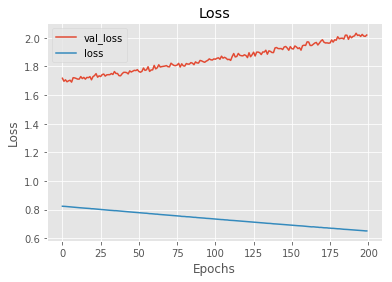

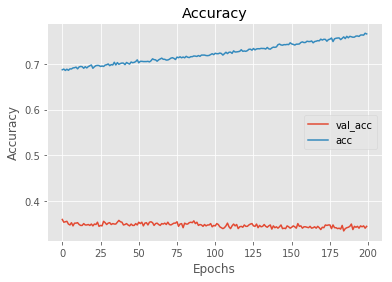

In [51]:
visualize_training_results(results_2)

In [64]:
y_group = y.map(lambda x: 0 if x in [1, 2, 3] else 
                1 if x in [4, 5] else 2)

In [65]:
X_train, X_test, y_group_train, y_group_test = train_test_split(
    X, y_group, test_size = 0.30, random_state = 42)

In [66]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), 
                              columns = X.columns)
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test), 
                              columns = X.columns, index = X_test.index)

In [67]:
y_train = keras.utils.to_categorical(y_group_train, 3)
y_test = keras.utils.to_categorical(y_group_test, 3)

In [79]:
model_3 = Sequential()
model_3.add(Dense(64, activation='relu', input_shape=(18,)))
model_3.add(Dense(32, activation='relu'))
model_3.add(Dense(3, activation='softmax'))

In [80]:
model_3.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [81]:
results_3 = model_3.fit(X_train_scaled, y_train, epochs=200, batch_size=50, validation_data=(X_test_scaled, y_test))

Train on 2336 samples, validate on 1002 samples
Epoch 1/200
2336/2336 [==============================] - 0s 141us/step - loss: 1.0134 - acc: 0.4979 - val_loss: 1.0051 - val_acc: 0.5100
Epoch 2/200
2336/2336 [==============================] - 0s 36us/step - loss: 0.9155 - acc: 0.6019 - val_loss: 0.9437 - val_acc: 0.5489
Epoch 3/200
2336/2336 [==============================] - 0s 37us/step - loss: 0.8580 - acc: 0.6237 - val_loss: 0.8999 - val_acc: 0.5808
Epoch 4/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.8188 - acc: 0.6408 - val_loss: 0.8698 - val_acc: 0.5918
Epoch 5/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.7916 - acc: 0.6498 - val_loss: 0.8513 - val_acc: 0.6028
Epoch 6/200
2336/2336 [==============================] - 0s 35us/step - loss: 0.7728 - acc: 0.6533 - val_loss: 0.8370 - val_acc: 0.6018
Epoch 7/200
2336/2336 [==============================] - 0s 33us/step - loss: 0.7587 - acc: 0.6605 - val_loss: 0.8259 - val_acc: 0.6128

2336/2336 [==============================] - 0s 35us/step - loss: 0.6634 - acc: 0.6999 - val_loss: 0.7646 - val_acc: 0.6337
Epoch 61/200
2336/2336 [==============================] - 0s 34us/step - loss: 0.6627 - acc: 0.7012 - val_loss: 0.7657 - val_acc: 0.6347
Epoch 62/200
2336/2336 [==============================] - 0s 42us/step - loss: 0.6619 - acc: 0.7029 - val_loss: 0.7654 - val_acc: 0.6337
Epoch 63/200
2336/2336 [==============================] - 0s 30us/step - loss: 0.6613 - acc: 0.7003 - val_loss: 0.7667 - val_acc: 0.6327
Epoch 64/200
2336/2336 [==============================] - 0s 36us/step - loss: 0.6604 - acc: 0.7042 - val_loss: 0.7658 - val_acc: 0.6337
Epoch 65/200
2336/2336 [==============================] - 0s 38us/step - loss: 0.6599 - acc: 0.7021 - val_loss: 0.7649 - val_acc: 0.6357
Epoch 66/200
2336/2336 [==============================] - 0s 51us/step - loss: 0.6593 - acc: 0.7016 - val_loss: 0.7660 - val_acc: 0.6367
Epoch 67/200
2336/2336 [==============================

Epoch 120/200
2336/2336 [==============================] - 0s 56us/step - loss: 0.6243 - acc: 0.7222 - val_loss: 0.7655 - val_acc: 0.6347
Epoch 121/200
2336/2336 [==============================] - 0s 44us/step - loss: 0.6241 - acc: 0.7205 - val_loss: 0.7655 - val_acc: 0.6287
Epoch 122/200
2336/2336 [==============================] - 0s 35us/step - loss: 0.6237 - acc: 0.7188 - val_loss: 0.7611 - val_acc: 0.6367
Epoch 123/200
2336/2336 [==============================] - 0s 35us/step - loss: 0.6229 - acc: 0.7252 - val_loss: 0.7610 - val_acc: 0.6357
Epoch 124/200
2336/2336 [==============================] - 0s 49us/step - loss: 0.6222 - acc: 0.7217 - val_loss: 0.7613 - val_acc: 0.6357
Epoch 125/200
2336/2336 [==============================] - 0s 35us/step - loss: 0.6218 - acc: 0.7192 - val_loss: 0.7631 - val_acc: 0.6317
Epoch 126/200
2336/2336 [==============================] - 0s 32us/step - loss: 0.6213 - acc: 0.7205 - val_loss: 0.7682 - val_acc: 0.6327
Epoch 127/200
2336/2336 [=========

2336/2336 [==============================] - 0s 30us/step - loss: 0.5871 - acc: 0.7363 - val_loss: 0.7756 - val_acc: 0.6387
Epoch 180/200
2336/2336 [==============================] - 0s 43us/step - loss: 0.5861 - acc: 0.7380 - val_loss: 0.7714 - val_acc: 0.6377
Epoch 181/200
2336/2336 [==============================] - 0s 32us/step - loss: 0.5855 - acc: 0.7436 - val_loss: 0.7791 - val_acc: 0.6387
Epoch 182/200
2336/2336 [==============================] - 0s 41us/step - loss: 0.5852 - acc: 0.7414 - val_loss: 0.7745 - val_acc: 0.6417
Epoch 183/200
2336/2336 [==============================] - 0s 34us/step - loss: 0.5846 - acc: 0.7372 - val_loss: 0.7765 - val_acc: 0.6397
Epoch 184/200
2336/2336 [==============================] - 0s 31us/step - loss: 0.5839 - acc: 0.7380 - val_loss: 0.7746 - val_acc: 0.6377
Epoch 185/200
2336/2336 [==============================] - 0s 33us/step - loss: 0.5832 - acc: 0.7397 - val_loss: 0.7780 - val_acc: 0.6397
Epoch 186/200
2336/2336 [=======================

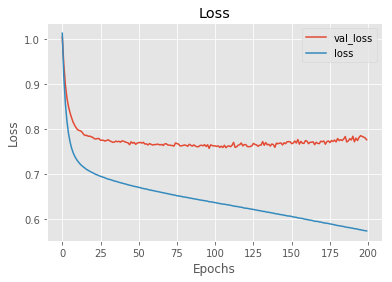

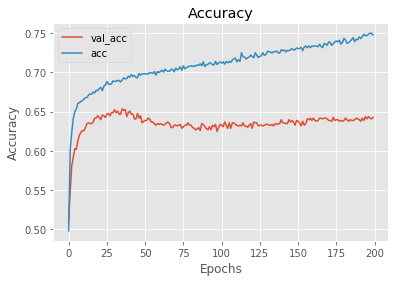

In [82]:
visualize_training_results(results_3)